<a href="https://colab.research.google.com/github/MelquiasRibeiro/Trasnformacao_visualizacao_de_dados/blob/master/Random_fire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#carregando as libs
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import plotly.express as px
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
import matplotlib.pyplot as plt


In [0]:
from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#usando o  'read_csv' da pandas para carregar os dados
amazon_df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/amazon_O_Corrigido.csv', encoding='latin1')
#Verificando se foi carregado corretamente(visualizando as 10 primieras linhas)
amazon_df.head(10)


,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
5,2003,Acre,Janeiro,10.0,2003-01-01
6,2004,Acre,Janeiro,0.0,2004-01-01
7,2005,Acre,Janeiro,12.0,2005-01-01
8,2006,Acre,Janeiro,4.0,2006-01-01
9,2007,Acre,Janeiro,0.0,2007-01-01


In [0]:
df=pd.DataFrame(amazon_df.number)
df.head()

,number
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [0]:
df['state']= amazon_df.state
df.head()

,number,state
0,0.0,Acre
1,0.0,Acre
2,0.0,Acre
3,0.0,Acre
4,0.0,Acre


In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(df.drop(['state'], axis='columns'),amazon_df.state,test_size=0.2)

In [0]:
len(x_train)

5163

In [0]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=)
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
model.score(x_test, y_test)

0.09914794732765299

In [0]:
y_predicted=model.predict(x_test)

In [0]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_predicted)
cm

array([[ 0,  1,  0,  1,  1,  0, 27,  0,  1,  2,  3,  1,  2,  0,  1,  1,
        15,  1,  1,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0, 11,  0,  0,  0,  0,  0,  3,  0,  0,  1,
        26,  1,  1,  0,  0,  0,  0],
       [ 0,  1,  0,  1,  0,  0, 21,  1,  1,  0,  1,  1,  4,  0,  1,  0,
        19,  2,  0,  2,  0,  0,  0],
       [ 1,  4,  0,  0,  2,  1,  4,  2,  3,  3,  1,  2,  6,  0,  0,  0,
        14,  2,  3,  0,  0,  0,  3],
       [ 0,  0,  0,  2,  2,  1,  0,  1,  6,  1,  9,  2,  4,  3,  2,  1,
         7,  1,  3,  0,  5,  0,  2],
       [ 0,  1,  0,  1,  1,  1, 12,  1,  0,  0,  6,  1,  5,  1,  0,  3,
        14,  0,  1,  0,  1,  0,  2],
       [ 0,  3,  0,  0,  0,  0, 17,  0,  1,  0,  1,  0,  1,  0,  0,  0,
        12,  0,  0,  0,  1,  1,  0],
       [ 0,  3,  0,  0,  0,  0,  7,  0,  1,  0,  2,  1,  8,  0,  0,  0,
        31,  0,  2,  6,  1,  0,  0],
       [ 0,  1,  0,  1,  3,  0,  1,  2,  0,  2,  6,  3,  3,  0,  0,  3,
         6,  1,  3,  2,  4,  1,  3],
       [ 1,  2,  0,

Text(69.0, 0.5, 'truth')

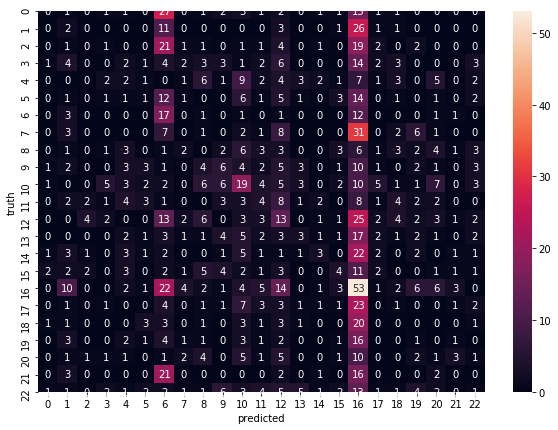

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn 
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')